# Computer Vision Course Project - Household Object Detection
#### Shubham Deshmukh (28), Atharva Deshpande (29), Ninad Ekbote (33),Vedant Ghodke (38)

<b>This is the code submitted for Phase 1 evaluation of the Computer Vision Course Project. The code targets two things viz: image re-processing and image feature extraction. At first, we have chosen a dataset of three different furniture types: Beds, Sofas and Chairs; each of these containing 200 images in RGB format.</b>

<b>The above process is followed by image pre-processing. Here we simply convert the entire dataset from RGB to Grey Scale format for ease of implementation and suitability for feature extraction. This is followed by the process of feature extraction. Here, the feature extraction method used is GLCM Feature Extraction. The chosen features (which suit the chosen dataset the best) are Contrast, Dissimilarity, Homogeneity, ASM, Energy and Correlation.</b>

 <b>Importing Relevant Directories:</b>

In [ ]:
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import xlsxwriter

<b>Importing The Image Dataset:</b>

In [ ]:
print("Welcome To Indoor Furniture Recognition!")
print("Authors - Shubham Deshmukh, Atharva Deshpande,Ninad Ekbote,Vedant Ghodke")
#path = input ("Please enter the path of the directory containing the dataset images : ")
Datadir="C:/Users/NINAD EKBOTE/Desktop/College/studies/Computer V/furniture-images/img/val"
#Datadir= path
Classes=["bed","chair","sofa"]
path=[]
i=0
for c in Classes:
    path.append(os.path.join(Datadir,c))
    print(path[i])
    i=i+1

<b>Actual Mathematical Formulae For Chosen Features:</b> 



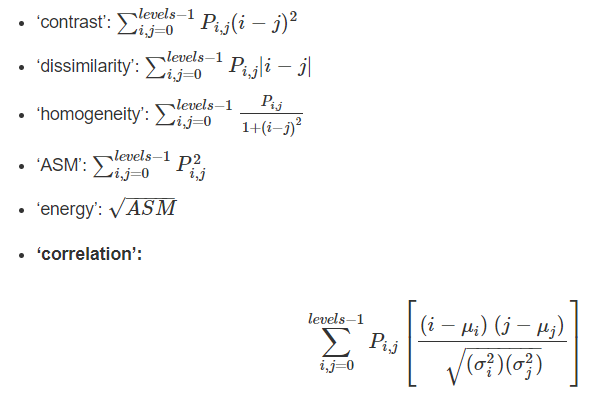 

<b>Image Pre-Processing And GLCM Feature Extraction:</b>

In [ ]:
r=1
outWorkbook=xlsxwriter.Workbook("val_sofa.xlsx")
outsheet=outWorkbook.add_worksheet()

# Pre-Formatting Excel File To Extract The Features:

outsheet.write("A1","contrast")
outsheet.write("B1","dissimilarity")
outsheet.write("C1","homogeneity")
outsheet.write("D1","ASM")
outsheet.write("E1","energy")
outsheet.write("F1","correlation")

for i in os.listdir(path[2]):
    img=cv2.imread(os.path.join(path[2],i),0)                               ### Conversion of image to Grey Scale (Image Pre-Processing)
    img=cv2.resize(img,(256,256))                                           ### Resizing of image to a sized of 256x256
    img_arr=np.array(img)                                                   ### Conversion of image to NP Array


# Image GLCM Features' Extraction:

    Glcm_mat=greycomatrix(img_arr,[2],[0],256,symmetric=True, normed=True)
    contrast=greycoprops(Glcm_mat, prop='contrast')
    dissimilarity=greycoprops(Glcm_mat, prop='dissimilarity')
    homogeneity=greycoprops(Glcm_mat, prop='homogeneity')
    ASM=greycoprops(Glcm_mat, prop='ASM')
    energy=greycoprops(Glcm_mat, prop='energy')
    correlation=greycoprops(Glcm_mat, 'correlation')

    outsheet.write(r,0,contrast)
    outsheet.write(r,1,dissimilarity)
    outsheet.write(r,2,homogeneity)
    outsheet.write(r,3,ASM)
    outsheet.write(r,4,energy)
    outsheet.write(r,5,correlation)

    r=r+1
    if(r==21):                  ### For validation dataset, break the loop at r=21, for training dataset, break loop at r=201
        break
outWorkbook.close()

<b>Randomizing rows of uniform dataset</b>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv(r'C:\Users\admin\Desktop\trainuniform.csv')
df = df.sample(frac = 1)
df.to_csv('train.csv')

In [ ]:
tf=pd.read_csv(r'C:\Users\admin\Desktop\valuniform.csv')
tf = tf.sample(frac = 1)
tf.to_csv('val.csv')

# Training

In [1]:
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
from skimage.feature import greycomatrix,greycoprops
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\train.csv')
df.head()

,Unnamed: 0,contrast,dissimilarity,homogeneity,ASM,energy,correlation,class
0,183,1519.905097,18.064453,0.187073,0.000402,0.020062,0.858351,0
1,1298,60.420460,2.399729,0.705441,0.032119,0.179218,0.881632,1
2,459,206.388949,8.848994,0.171042,0.000424,0.020595,0.839316,0
3,691,327.449219,5.080309,0.612419,0.275445,0.524829,0.953331,0
4,1269,456.285910,6.752784,0.394209,0.002105,0.045882,0.928826,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2700 non-null   int64  
 1   contrast       2700 non-null   float64
 2   dissimilarity  2700 non-null   float64
 3   homogeneity    2700 non-null   float64
 4   ASM            2700 non-null   float64
 5   energy         2700 non-null   float64
 6   correlation    2700 non-null   float64
 7   class          2700 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 168.9 KB


In [4]:
print(df.isna().sum())

Unnamed: 0       0
contrast         0
dissimilarity    0
homogeneity      0
ASM              0
energy           0
correlation      0
class            0
dtype: int64


In [5]:
df.columns

Index(['Unnamed: 0', 'contrast', 'dissimilarity', 'homogeneity', 'ASM',
       'energy', 'correlation', 'class'],
      dtype='object')

In [6]:
df['class'].value_counts()

0    900
2    900
1    900
Name: class, dtype: int64

In [7]:
df= df.drop('Unnamed: 0', axis=1)
x = df.drop('class', axis=1)
y = df['class']
x.head()

,contrast,dissimilarity,homogeneity,ASM,energy,correlation
0,1519.905097,18.064453,0.187073,0.000402,0.020062,0.858351
1,60.420460,2.399729,0.705441,0.032119,0.179218,0.881632
2,206.388949,8.848994,0.171042,0.000424,0.020595,0.839316
3,327.449219,5.080309,0.612419,0.275445,0.524829,0.953331
4,456.285910,6.752784,0.394209,0.002105,0.045882,0.928826


In [8]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
sc = StandardScaler()
x = sc.fit_transform(x)
x=DataFrame(x)
x

,0,1,2,3,4,5
0,2.740780,1.733260,-0.772099,-0.390828,-0.504163,-0.989311
1,-1.361102,-1.709675,2.192637,-0.086317,0.419689,-0.585129
2,-0.950858,-0.292197,-0.863785,-0.390620,-0.501068,-1.319788
3,-0.610618,-1.120513,1.660610,2.249861,2.425858,0.659664
4,-0.248522,-0.752921,0.412585,-0.374480,-0.354283,0.234225
...,...,...,...,...,...,...
2695,-1.255387,-1.874226,2.841329,1.351964,1.855238,-1.542074
2696,-1.066211,-0.841508,-0.459916,-0.387947,-0.466754,0.922731
2697,-0.235107,-0.282385,0.600315,0.700860,1.340205,0.772565
2698,0.548500,0.917051,-1.036713,-0.392788,-0.538864,-1.571736


In [9]:
correlation=x.corr()
correlation

,0,1,2,3,4,5
0,1.000000,0.831038,-0.231312,-0.017764,-0.042541,-0.656463
1,0.831038,1.000000,-0.654043,-0.318159,-0.387292,-0.687732
2,-0.231312,-0.654043,1.000000,0.770340,0.855937,0.280712
3,-0.017764,-0.318159,0.770340,1.000000,0.962450,0.036216
4,-0.042541,-0.387292,0.855937,0.962450,1.000000,0.107330
5,-0.656463,-0.687732,0.280712,0.036216,0.107330,1.000000


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [11]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.03)
# Train Adaboost Classifer
model = abc.fit(x_train,y_train)
from sklearn import metrics
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5074074074074074


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.49      0.44       158
           1       0.61      0.45      0.52       196
           2       0.54      0.58      0.55       186

    accuracy                           0.51       540
   macro avg       0.51      0.51      0.51       540
weighted avg       0.52      0.51      0.51       540



# Testing

In [14]:
tf=pd.read_csv(r'C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\val.csv')
tf.head()

,Unnamed: 0,contrast,dissimilarity,homogeneity,ASM,energy,correlation,class
0,201,635.471349,13.537202,0.255135,0.000401,0.020035,0.885367,2
1,217,343.540846,3.880352,0.671095,0.241293,0.491216,0.983768,2
2,160,704.991511,10.143824,0.441720,0.001257,0.035448,0.914014,1
3,129,307.985498,6.233222,0.287969,0.000482,0.021962,0.970347,1
4,222,362.317913,4.146900,0.730625,0.371478,0.609490,0.982963,2


In [15]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     300 non-null    int64  
 1   contrast       300 non-null    float64
 2   dissimilarity  300 non-null    float64
 3   homogeneity    300 non-null    float64
 4   ASM            300 non-null    float64
 5   energy         300 non-null    float64
 6   correlation    300 non-null    float64
 7   class          300 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [16]:
print(tf.isna().sum())

Unnamed: 0       0
contrast         0
dissimilarity    0
homogeneity      0
ASM              0
energy           0
correlation      0
class            0
dtype: int64


In [17]:
tf.columns

Index(['Unnamed: 0', 'contrast', 'dissimilarity', 'homogeneity', 'ASM',
       'energy', 'correlation', 'class'],
      dtype='object')

In [18]:
tf['class'].value_counts()

0    100
1    100
2    100
Name: class, dtype: int64

In [19]:
tf= tf.drop('Unnamed: 0', axis=1)
x_test = tf.drop('class', axis=1)
Y_test = tf['class']
x_test.head()

,contrast,dissimilarity,homogeneity,ASM,energy,correlation
0,635.471349,13.537202,0.255135,0.000401,0.020035,0.885367
1,343.540846,3.880352,0.671095,0.241293,0.491216,0.983768
2,704.991511,10.143824,0.441720,0.001257,0.035448,0.914014
3,307.985498,6.233222,0.287969,0.000482,0.021962,0.970347
4,362.317913,4.146900,0.730625,0.371478,0.609490,0.982963


In [20]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
x_test = sc.transform(x_test)
x_test=DataFrame(x_test)
x_test

,0,1,2,3,4,5
0,0.255079,0.738219,-0.382830,-0.390838,-0.504320,-0.520284
1,-0.565392,-1.384250,1.996197,1.921965,2.230745,1.188075
2,0.450465,-0.007608,0.684321,-0.382628,-0.414853,-0.022939
3,-0.665320,-0.867115,-0.195039,-0.390061,-0.493132,0.955074
4,-0.512619,-1.325666,2.336673,3.171868,2.917288,1.174102
...,...,...,...,...,...,...
295,-0.562288,-0.134136,-0.310358,-0.383948,-0.426430,0.392955
296,0.273341,0.780795,-1.028771,-0.392371,-0.530365,-1.178560
297,1.305652,0.602308,1.160213,1.215213,1.756342,-0.451967
298,1.083602,1.425746,-0.590442,-0.388790,-0.476687,-0.701828


In [21]:
Yt=abc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Yt))
print(Yt)

Accuracy: 0.4866666666666667
[0 2 1 2 2 0 1 2 0 2 1 2 2 0 0 0 1 2 0 2 2 0 1 1 1 1 0 1 2 1 0 2 2 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 1 2 0 1 0 2 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 2 1 0 1 2
 1 2 0 2 1 0 1 0 0 2 1 2 0 0 0 0 1 2 1 0 1 2 0 0 1 1 0 1 2 1 0 2 0 1 1 2 2
 1 1 2 0 2 2 2 2 0 1 1 1 1 2 1 2 1 0 0 1 2 0 2 0 0 2 1 1 1 0 2 0 1 0 2 1 0
 1 2 1 2 2 2 0 2 2 1 0 0 1 2 1 2 0 1 0 2 0 2 1 0 2 1 2 0 1 0 2 0 2 0 1 1 0
 0 1 0 2 0 0 2 0 1 2 2 1 0 1 0 0 0 1 1 0 2 2 2 0 2 2 0 1 2 0 1 1 2 0 0 2 0
 0 2 0 0 1 1 0 0 1 0 0 0 0 0 2 0 1 2 1 1 1 0 1 0 1 1 0 0 0 2 0 0 1 0 1 2 0
 1 2 0 1 0 1 2 0 2 0 1 1 2 0 1 1 1 0 1 1 1 2 1 0 2 1 0 1 1 0 1 2 2 2 0 2 0
 1 1 0 1]


In [22]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Yt))

              precision    recall  f1-score   support

           0       0.39      0.45      0.42       100
           1       0.55      0.57      0.56       100
           2       0.55      0.44      0.49       100

    accuracy                           0.49       300
   macro avg       0.50      0.49      0.49       300
weighted avg       0.50      0.49      0.49       300



# Recognition  

 <b>Class: 0 (Bed)</b>

Please enter the path of the Bed image :C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\bed.jpg


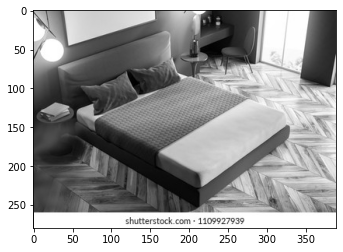

In [23]:
path=input("Please enter the path of the Bed image :")
r=1
import xlsxwriter
outWorkbook=xlsxwriter.Workbook("bed.xlsx")
outsheet=outWorkbook.add_worksheet()

# Pre-Formatting Excel File To Extract The Features:

outsheet.write("A1","contrast")
outsheet.write("B1","dissimilarity")
outsheet.write("C1","homogeneity")
outsheet.write("D1","ASM")
outsheet.write("E1","energy")
outsheet.write("F1","correlation")

img=cv2.imread(path,0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))                        ### Conversion of image to Grey Scale (Image Pre-Processing)
img=cv2.resize(img,(256,256))                                           ### Resizing of image to a sized of 256x256
img_arr=np.array(img)                                                   ### Conversion of image to NP Array


# Image GLCM Features' Extraction:

Glcm_mat=greycomatrix(img_arr,[2],[0],256,symmetric=True, normed=True)
contrast=greycoprops(Glcm_mat, prop='contrast')
dissimilarity=greycoprops(Glcm_mat, prop='dissimilarity')
homogeneity=greycoprops(Glcm_mat, prop='homogeneity')
ASM=greycoprops(Glcm_mat, prop='ASM')
energy=greycoprops(Glcm_mat, prop='energy')
correlation=greycoprops(Glcm_mat, 'correlation')

outsheet.write(r,0,contrast)
outsheet.write(r,1,dissimilarity)
outsheet.write(r,2,homogeneity)
outsheet.write(r,3,ASM)
outsheet.write(r,4,energy)
outsheet.write(r,5,correlation)
    
outWorkbook.close()

In [24]:
test_bed=pd.read_excel(r'C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\bed.xlsx')
test_bed.head()
test_bed = sc.transform(test_bed)
test_bed=DataFrame(test_bed)
test_bed

,0,1,2,3,4,5
0,0.11641,0.472731,-0.537383,-0.373071,-0.345152,0.53455


In [25]:
testb=abc.predict(test_bed)
print(testb)

[0]


 <b>Class: 1 (Chair)</b>

Please enter the path of the Chair image :C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\chair.jpg


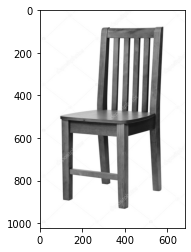

In [27]:
path=input("Please enter the path of the Chair image :")
r=1
import xlsxwriter
outWorkbook=xlsxwriter.Workbook("chair.xlsx")
outsheet=outWorkbook.add_worksheet()

# Pre-Formatting Excel File To Extract The Features:

outsheet.write("A1","contrast")
outsheet.write("B1","dissimilarity")
outsheet.write("C1","homogeneity")
outsheet.write("D1","ASM")
outsheet.write("E1","energy")
outsheet.write("F1","correlation")

img=cv2.imread(path,0)                                                   ### Conversion of image to Grey Scale (Image Pre-Processing)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
img=cv2.resize(img,(256,256))                                           ### Resizing of image to a sized of 256x256
img_arr=np.array(img)                                                   ### Conversion of image to NP Array


# Image GLCM Features' Extraction:

Glcm_mat=greycomatrix(img_arr,[2],[0],256,symmetric=True, normed=True)
contrast=greycoprops(Glcm_mat, prop='contrast')
dissimilarity=greycoprops(Glcm_mat, prop='dissimilarity')
homogeneity=greycoprops(Glcm_mat, prop='homogeneity')
ASM=greycoprops(Glcm_mat, prop='ASM')
energy=greycoprops(Glcm_mat, prop='energy')
correlation=greycoprops(Glcm_mat, 'correlation')

outsheet.write(r,0,contrast)
outsheet.write(r,1,dissimilarity)
outsheet.write(r,2,homogeneity)
outsheet.write(r,3,ASM)
outsheet.write(r,4,energy)
outsheet.write(r,5,correlation)
outWorkbook.close()    

In [28]:
test_chair=pd.read_excel(r'C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\chair.xlsx')
test_chair.head()
test_chair = sc.transform(test_chair)
test_chair=DataFrame(test_chair)
test_chair

,0,1,2,3,4,5
0,3.154659,0.584069,1.757407,2.579778,2.610303,-1.150947


In [29]:
testc=abc.predict(test_chair)
print(testc)

[1]


 <b>Class: 2 (Sofa)</b>

Please enter the path of the Sofa image :C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\sofa.jpg


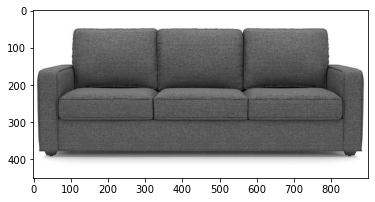

In [30]:
path=input("Please enter the path of the Sofa image :")
r=1
import xlsxwriter
outWorkbook=xlsxwriter.Workbook("sofa.xlsx")
outsheet=outWorkbook.add_worksheet()

# Pre-Formatting Excel File To Extract The Features:

outsheet.write("A1","contrast")
outsheet.write("B1","dissimilarity")
outsheet.write("C1","homogeneity")
outsheet.write("D1","ASM")
outsheet.write("E1","energy")
outsheet.write("F1","correlation")

img=cv2.imread(path,0)                                                  ### Conversion of image to Grey Scale (Image Pre-Processing)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
img=cv2.resize(img,(256,256))                                           ### Resizing of image to a sized of 256x256
img_arr=np.array(img)                                                   ### Conversion of image to NP Array


# Image GLCM Features' Extraction:

Glcm_mat=greycomatrix(img_arr,[2],[0],256,symmetric=True, normed=True)
contrast=greycoprops(Glcm_mat, prop='contrast')
dissimilarity=greycoprops(Glcm_mat, prop='dissimilarity')
homogeneity=greycoprops(Glcm_mat, prop='homogeneity')
ASM=greycoprops(Glcm_mat, prop='ASM')
energy=greycoprops(Glcm_mat, prop='energy')
correlation=greycoprops(Glcm_mat, 'correlation')

outsheet.write(r,0,contrast)
outsheet.write(r,1,dissimilarity)
outsheet.write(r,2,homogeneity)
outsheet.write(r,3,ASM)
outsheet.write(r,4,energy)
outsheet.write(r,5,correlation)
outWorkbook.close()

In [31]:
test_sofa=pd.read_excel(r'C:\Users\admin\Desktop\TY Go Carona Go Sem2\CV\CV CP\sofa.xlsx')
test_sofa.head()
test_sofa = sc.transform(test_sofa)
test_sofa=DataFrame(test_sofa)
test_sofa

,0,1,2,3,4,5
0,-0.34966,-0.551496,0.267662,0.136064,0.744184,0.852428


In [32]:
tests=abc.predict(test_sofa)
print(tests)

[2]


# Real time Detection

In [33]:
def classify(cropped):
    
    img=cropped                                                  ### Conversion of image to Grey Scale (Image Pre-Processing)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(256,256))                                           ### Resizing of image to a sized of 256x256
    img_arr=np.array(img)

    Glcm_mat=greycomatrix(img_arr,[2],[0],256,symmetric=True, normed=True)
    contrast=greycoprops(Glcm_mat, prop='contrast')
    dissimilarity=greycoprops(Glcm_mat, prop='dissimilarity')
    homogeneity=greycoprops(Glcm_mat, prop='homogeneity')
    ASM=greycoprops(Glcm_mat, prop='ASM')
    energy=greycoprops(Glcm_mat, prop='energy')
    correlation=greycoprops(Glcm_mat, 'correlation')

    contrast=pd.DataFrame(contrast)
    dissimilarity=pd.DataFrame(dissimilarity)
    homogeneity=pd.DataFrame(homogeneity)
    ASM=pd.DataFrame(ASM)
    energy=pd.DataFrame(energy)
    correlation=pd.DataFrame(correlation)
    out=pd.concat([contrast,dissimilarity,homogeneity,ASM,energy,correlation],axis=1)

    test1 = sc.transform(out)
    test1=DataFrame(test1)
    pred=abc.predict(test1)
    return pred
  
def final_class(prediction):
    
    B="Bed"
    C="Chair"
    S="Sofa"
    n="not_sure"
    #loop through predicted output, crosschecked with desired output 
    for i in prediction:
        if(i==0):
            return B
        elif(i==1):
            return C
        elif(i==2):
            return S
        elif(i==3):
            return n
    

cap = cv2.VideoCapture(0)

while True:
    # Get webcam images
    ret, frame = cap.read()

    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    
    cropped = frame
    prediction =classify(cropped)
    
    output=final_class(prediction)

    
    cv2.putText(frame, output,(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(255,128,0), 2)
    cv2.imshow('Recognition using GLCM', frame)
    if cv2.waitKey(1) == 27: #esc is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()